# Install dependence

In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13501121369637060064
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2912786843
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4308712347986536799
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


# Remove invalid image

In [6]:
import cv2
import imghdr

In [7]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data')
print(data_dir)

C:\Users\CaoDucAnh\Desktop\Folders\ProjectAI\Start-with-simple-deeplearning-model\data


In [8]:
image_valid = ['jpeg', 'jpg', 'png', 'bmp']

In [9]:
for image_class in os.listdir(data_dir):
    for image_file in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image_file)
        try:
            img = cv2.imread(image_path)
            image_type = imghdr.what(image_path)
            if image_type not in image_valid:
                print(f'Image type is invalid: {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Have issue with image: {image_path} \nError: {e}')
            

# Load data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
print(type(batch))

<class 'tuple'>


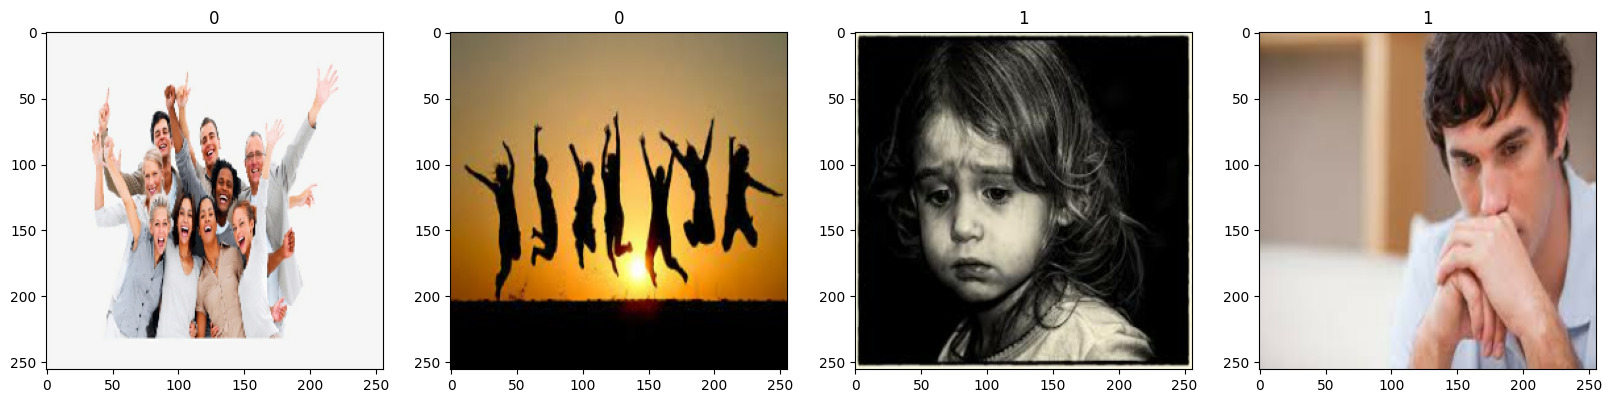

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale images

In [16]:
dataset = data.map(lambda x, y: (x/255, y))

In [ ]:
dataset.as_numpy_iterator().next()

# Split data

In [20]:
train_size = int(len(dataset)*0.7)
val_size = int(len(dataset)*0.2)
test_size = int(len(dataset) - train_size - val_size)
print(f'Train size: {train_size}, Valid size: {val_size}, Test size: {test_size}')

Train size: 7, Valid size: 2, Test size: 1


In [21]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

# Build classify model

In [22]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [28]:
log_dir = os.path.join(current_dir, 'log')

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [30]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 10s 365ms/step - loss: 1.5842 - accuracy: 0.4955 - val_loss: 0.7371 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 4s 336ms/step - loss: 0.7137 - accuracy: 0.4598 - val_loss: 0.6907 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 3s 326ms/step - loss: 0.6891 - accuracy: 0.5312 - val_loss: 0.6739 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 4s 375ms/step - loss: 0.6725 - accuracy: 0.5670 - val_loss: 0.6408 - val_accuracy: 0.6250
Epoch 5/20
7/7 [==============================] - 4s 351ms/step - loss: 0.6496 - accuracy: 0.5893 - val_loss: 0.5828 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 3s 328ms/step - loss: 0.5559 - accuracy: 0.7232 - val_loss: 0.4749 - val_accuracy: 0.7812
Epoch 7/20
7/7 [==============================] - 4s 349ms/step - loss: 0.4931 - accuracy: 0.7321 - val_loss: 0.4707 - val_accuracy: 0.7812
Epoch 8/20
7/7 [===

# Plot performance

In [31]:
type(history)

keras.callbacks.History

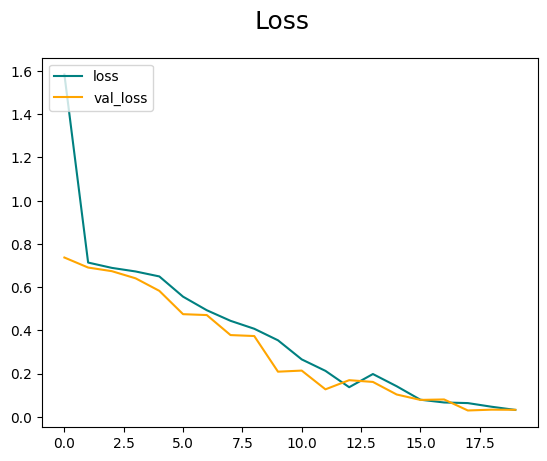

In [34]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=18)
plt.legend(loc='upper left')
plt.show()

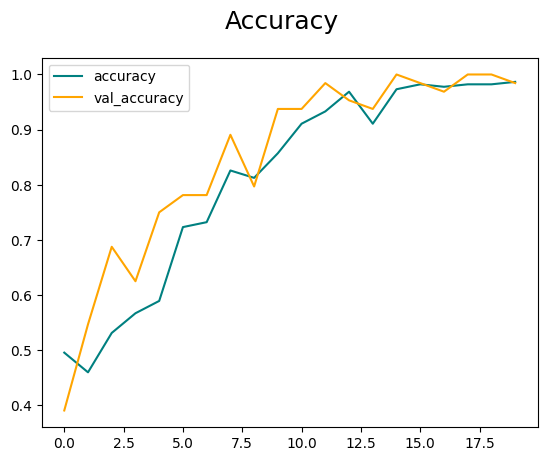

In [36]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    y_hat = model.predict(X)
    pre.update_state(y, y_hat)
    re.update_state(y, y_hat)
    acc.update_state(y, y_hat)

1/1 [==============================] - 1s 560ms/step


In [41]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, BinaryAccuracy: {acc.result()}')

Precision: 1.0, Recall: 1.0, BinaryAccuracy: 1.0


# Test

In [42]:
import cv2

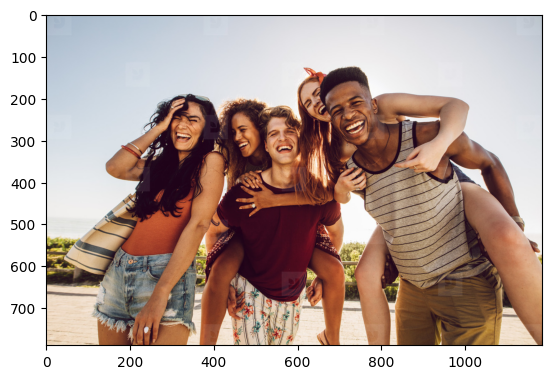

In [46]:
img = cv2.imread('happy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

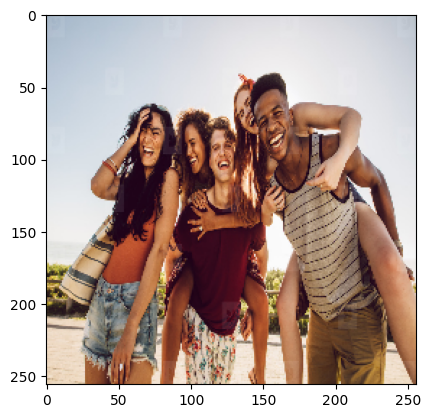

In [47]:
img_resize = tf.image.resize(img, (256,256))
plt.imshow(img_resize.numpy().astype(int))
plt.show()

In [49]:
y_hat = model.predict(np.expand_dims(img_resize/255, 0))

1/1 [==============================] - 0s 222ms/step


In [50]:
y_hat

array([[0.00013406]], dtype=float32)

In [52]:
if y_hat > 0.5:
    print('Sad')
else:
    print('Happy')

Happy


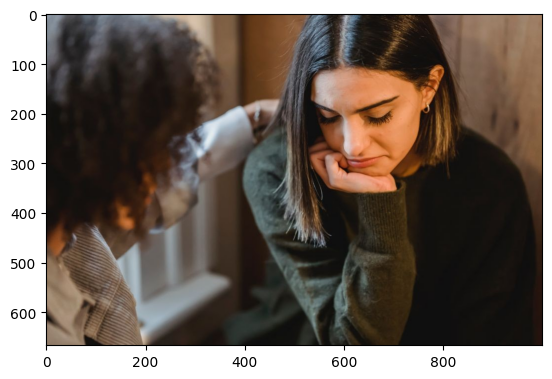

In [53]:
img2 = cv2.imread('sad.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

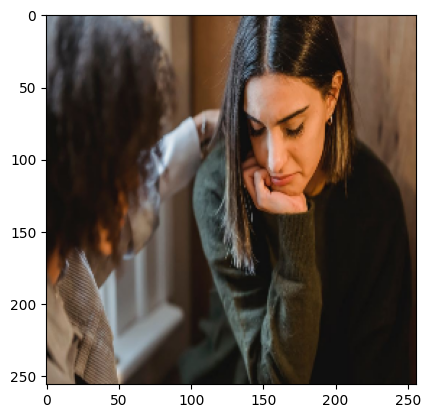

In [54]:
img_resize2 = tf.image.resize(img2, (256,256))
plt.imshow(img_resize2.numpy().astype(int))
plt.show()

In [55]:
y_hat2 = model.predict(np.expand_dims(img_resize2/255, 0))

1/1 [==============================] - 0s 33ms/step


In [56]:
y_hat2

array([[0.99953663]], dtype=float32)

In [57]:
if y_hat2 > 0.5:
    print('Sad')
else:
    print('Happy')

Sad


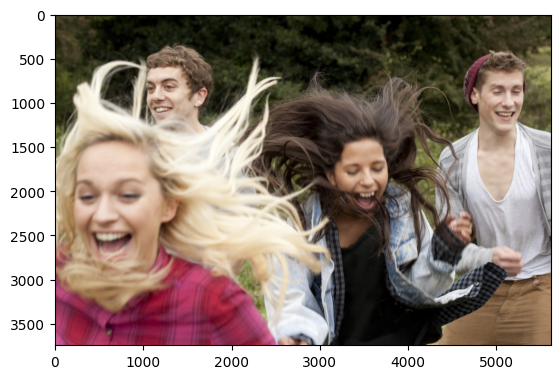

In [64]:
img3 = cv2.imread('happy2.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

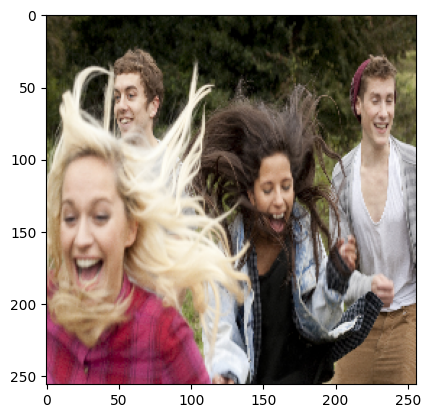

In [60]:
img_resize3 = tf.image.resize(img3, (256,256))
plt.imshow(img_resize3.numpy().astype(int))
plt.show()

In [62]:
y_hat3 = model.predict(np.expand_dims(img_resize3/255, 0))
y_hat3
if y_hat3 > 0.5:
    print('Sad')
else:
    print('Happy')

1/1 [==============================] - 0s 23ms/step
Happy


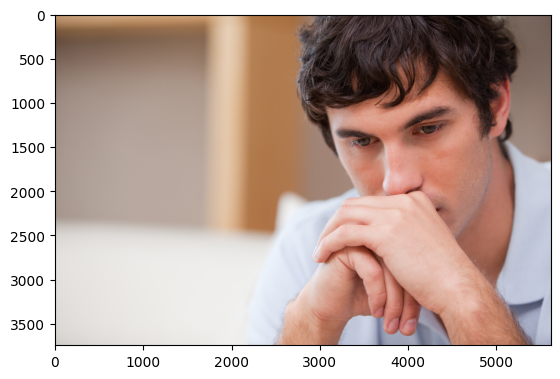

In [63]:
img4 = cv2.imread('sad2.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4)
plt.show()

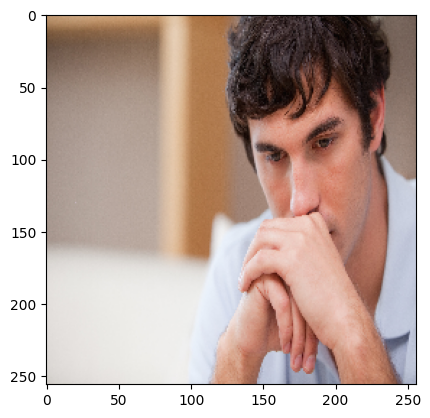

In [65]:
img_resize4 = tf.image.resize(img4, (256,256))
plt.imshow(img_resize4.numpy().astype(int))
plt.show()

In [67]:
y_hat4 = model.predict(np.expand_dims(img_resize4/255, 0))
y_hat4
if y_hat4 > 0.5:
    print('Sad')
else:
    print('Happy')

1/1 [==============================] - 0s 26ms/step
Sad


# Save model

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save(os.path.join('models', 'simple_image_classifier.h5'))

In [70]:
# Test if model is saved
new_model = load_model(os.path.join('models', 'simple_image_classifier.h5'))

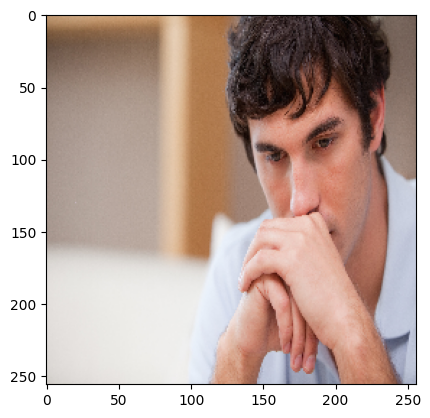

1/1 [==============================] - 0s 23ms/step
Sad


In [72]:
plt.imshow(img_resize4.numpy().astype(int))
plt.show()
y_hat5 = new_model.predict(np.expand_dims(img_resize4/255, 0))
y_hat5
if y_hat5 > 0.5:
    print('Sad')
else:
    print('Happy')